# 통계분석

## 1. t-test

In [1]:
# 특정 집단의 평균의 값을 추정하거나 차이를 검정할 때 사용
# 종속변수는 연속형 변수 독립변수는 성별, 종교 등과 같은 범주형 변수
# 예시: A의 집단과 B 집단에서 표본을 추출하고 몸무게의 평균 차리를 비교하였을 때, 2kg의 차이가 났다. 과연, 이 몸무게의 차이는 두 집단의 몸무게가 차이가 난다고 할 수 있을까?

### 1)일표본 T-검정
- 단일 모집단에서 관심이 있는 연속형 변수의 평균 값을 특정 기준값과 비교한다.
- 가정: 모집단의 구성요소들이 정규분포를 이룬다.

In [1]:
import pandas as pd

session_times = pd.read_csv('./data/web_page_data.csv')
session_times.Time = 100 * session_times.Time # 초 단위로 변환

session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


In [2]:
session_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Page    36 non-null     object 
 1   Time    36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [3]:
session_times.Time.mean()

141.19444444444446

In [4]:
import scipy.stats as stats
from scipy.stats import shapiro

# shapiro(x): 귀무가설 - 정규성을 가정, 대립가설: 정규성을 가지지 않는다.
mu = 140
shapiro(session_times['Time'])
# pvalue가 유의수준 0.05보다 작으므로 정규성을 따른다는 귀무가설을 기각한다. 즉 session_time 데이터의 Time 변수는 정규분포를 따르지 않는다.
# 데이터가 정규분포를 따르지 않으므로 wilcoxon test로 t-test를 진행한다.
# 만약 정규분포를 따른다면 stats.ttest_1samp(session_times.Time, pepmean=mu)를 사용한다.

ShapiroResult(statistic=0.8981886506080627, pvalue=0.003045543795451522)

In [5]:
stats.wilcoxon(session_times.Time-mu, alternative='two-sided')
# Wilcoxon test 결과 p-value는 유의수준 0.05보다 크므로 귀무가설을 기각할 수 없다.

WilcoxonResult(statistic=301.0, pvalue=0.6151263942495695)

Text(0, 0.5, 'Count')

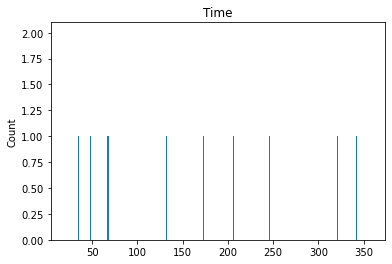

In [7]:
import matplotlib.pyplot as plt
session_times_Time_cnt = pd.value_counts(session_times['Time'].values, sort=False)
width= 0.4
plt.bar(session_times_Time_cnt.index, session_times_Time_cnt.values,width)
plt.title("Time")
plt.ylabel('Count')

### 2)대응표본 T-검정
- 단일모집단에 대해 어떠한 처리를 가했을 때, 처리 전후에 따른 평균의 차이를 비교할 때 사용
- 표본 내 개채들에 대해 두번의 측정을 한다. (같은 집단이므로 등분산성 만족)
- 모집단의 관측값이 정규성을 만족해야 한다는 가정이 있다.
- if: 정규성 만족 -> stats.ttest_rel(X_pre.variable, X_post.variable)
- if: 정규성 만족x -> 윌콕슨의 부호 순위 검정 stats.Wilcoxon(X_pre.variable, X_post.variable, alternative = 'greater' or 'less' or 'two_sided')

In [10]:
# 데이터 불러오기 및 확인
import pandas as pd
data={'before':[7,3,4,5,2,1,6,6,5,4],
     'after':[8,4,5,6,2,3,6,8,6,5]}
data = pd.DataFrame(data)
data

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [14]:
# 정규성 검증
before_test = shapiro(data['before'])
after_test =  shapiro(data['after'])
print(before_test)
print(after_test)

# 두 변수다 p-value가 유의수준 0.05보다 크므로 정규성을 만족한다는 귀무가설을 채택한다.

ShapiroResult(statistic=0.9644594192504883, pvalue=0.8352694511413574)
ShapiroResult(statistic=0.9456835985183716, pvalue=0.6177982091903687)


In [16]:
# 귀무가설: 수면제 복용 전과 후의 수면시간 차이는 없다. 수면제 복용 후 수면시간의 평균이 증가하지 않았다..
# 대립가설: 수면제 복용 전과 후의 수면시간 차이는 있다. 수면제 복용 후 수면시간의 평균이 증가했다.
stats.ttest_rel(data['after'],data['before'], alternative='greater')

# 검증결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 
# 결론: 영양제 복용 후 수면시간이 늘었다.

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082764)

In [17]:
data.mean()

before    4.3
after     5.3
dtype: float64

### 3) 독립표본 t-test
- 두 개의 독립된 모집단의 평균을 비교할 때
- 모집단의 모수, 표본이 모두 2개씩 존재 (등분산성의 가정 필요)
- 두 모집단의 정규성을 만족해야 한다.
- 정규성 검정 -> 등분산성 검정 -> stats.ttest_ind(X1,X2, equal_var = True)
- 정규성 만족 x -> 윌콕슨의 부호 순위 검정
- 정규성 만족 0, 등분산성 만족 x -> stats.ttest_ind(X1,X2, equal_var = False)

In [23]:
import pandas as pd
data = pd.DataFrame({'M':[117, 108, 105, 89, 101, 93, 96, 108, 108, 94, 93, 112, 92, 91, 100, 96, 120, 86, 96, 95],
                    'F':[121, 101, 102, 114, 103, 105, 101, 131, 96, 109, 109, 113, 115, 94, 108, 96, 110, 112, 120, 100]})
data

,M,F
0,117,121
1,108,101
2,105,102
3,89,114
4,101,103
5,93,105
6,96,101
7,108,131
8,108,96
9,94,109


In [25]:
# 정규성 검정
M_test = shapiro(data['M'])
F_test =  shapiro(data['F'])
print(M_test)
print(F_test)
#  두 변수 다 p-value가 유의수준 0.05 보다 크므로 귀무가설을 채택한다, 즉 정규성을 만족한다.

ShapiroResult(statistic=0.9326358437538147, pvalue=0.17352667450904846)
ShapiroResult(statistic=0.9615263938903809, pvalue=0.5747753381729126)


In [26]:
# 등분산 검정
# levene-test의 들어가는 값은 Series 데이터의 길이는 같아야 한다.

stats.levene(data['M'],data['F'])
# 검증결과 등분산성 만족 -> stats.ttest_ind(equal_var=True)

LeveneResult(statistic=0.0025085819910218993, pvalue=0.960316403908281)

In [29]:
# 귀무가설 : 남자와 여자의 차이는 없다.
# 대립가설: 남자와 여자의 차이는 있다.
stats.ttest_ind(data['M'],data['F'],equal_var=True)

# 검증결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 
# 결론: 남자와 여자의 치이는 있다.

Ttest_indResult(statistic=-2.670573872669349, pvalue=0.011082895240510138)

In [30]:
print(data['M'].mean())
print(data['F'].mean())


100.0
108.0


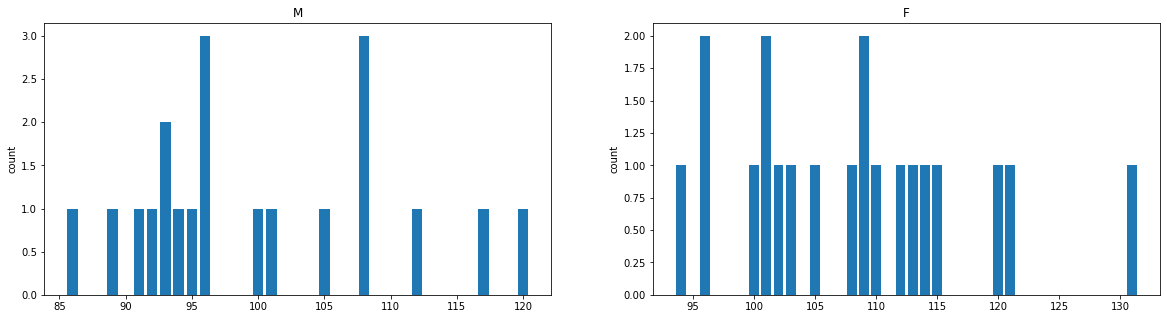

In [39]:
# 시각화
m_cnt = data['M'].value_counts(sort= False)
f_cnt = data['F'].value_counts(sort= False)
fig, axs = plt.subplots(1,2,figsize=(20,5))
width= 0,4
axs[0].bar(m_cnt.index, m_cnt.values)
axs[0].set_title('M')
axs[0].set_ylabel('count')
axs[1].bar(f_cnt.index, f_cnt.values)
axs[1].set_title('F')
axs[1].set_ylabel('count')
plt.show()

# 분산분석
- 두 개 이상의 다수 집단 간 평균을 비교하는 통계분석 방법 종속변수는 연속형, 독립변수는 범주형 변수
- 분산분석은 개수에 따라 일원배치, 이원배치, 다원배치 분산분석으로 나뉜다.
- 두 개 이상의 집단에서 그룹 평균 간 차이를 그룹 내 변동에 비교하여 살표보는 통계분석
- 집단 내에 분산보다 다른 집단과의 분산이 더 크다면 유의하다고 할 수 있다는 개념을 갖고 있다.



- 단일변량 분산분석의 종류
1.  일원배치 분산분석: 독립변수 1개 종속변수 1개
2.  이원배치 분산분석: 독립변수 2개 종속변수 1개
3.  다원배치 분삭분석: 독립변수 3개 이상 종속변수 1개

- 다변량 분산분석(MANOVA): 독립변수 1개 이상 종속변수 개수 2개 이상

### 1) 일원배치 분산분석
1. 개념

- 반응값에 대한 하나의 범주형 변수의 영향을 알아보기 위해 사용되는 검증방법
- 모집단의 수에는 제한이 없고 표본의 수는 같지 않아도 됨
- F 검정 통계량 이용

2. 가정

- 집단의 측정치는 서로 독립적이며 정규분포를 따른다.
- 집단 측정치의 분산은 같다.(등분산 가정)

3. 가설 

- 귀무가설: K개의 집단 간 모평균에는 차이가 없다. 
- 대립가설: K개의 집단 간 모평균은 차이가 있다.

4. 사후검정
 
- 분산분석의 결과 귀무가설이 기각되어 적어도 한 집단에서 평균의 차이가 있음이 통계적으로 증명됐을 경우 어떤 집단들에 대해서 평균의 차이가 존재하는지 알아보기 위한 분석 
- 종류: 던칸의 MRT, vitudml LSD, 튜키의 HSD방법 등

5. 단계
- 정규성 검정 0  -> 등분산 검정 0 -> stats.f_oneway()
- 정규성 검정 0 -> 등분산 검정 X -> pg.welck_anova(dv = 양적자료, Between= "집단 질적자료", Data= )
- 정규성 검정 X -> stats.kruskal()

In [6]:
import pandas as pd
from sklearn.datasets import load_iris
import scipy.stats as stats

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
iris['target'] = load_iris().target
iris['target'] = iris['target'].map({0:'Setosa',1:'Versicolour',2:'Virginica'})
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
# target 변수 분포 확인
iris.target.value_counts()

Setosa         50
Versicolour    50
Virginica      50
Name: target, dtype: int64

In [15]:
target_list= iris['target'].unique()
setosa = iris[iris['target']==target_list[0]]['sepal width']
versicolor = iris[iris['target']==target_list[1]]['sepal width']
virginica = iris[iris['target']==target_list[0]]['sepal width']

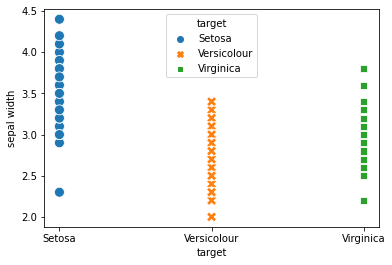

In [18]:
# 분포 시각화
import seaborn as sns 
import matplotlib.pyplot as plt
sns.scatterplot( x='target', y='sepal width', hue='target', style= 'target', s = 100, data=iris)
plt.show()

In [25]:
# 귀무가설: 세 가지 종에 대한 sepal width의 평균은 모두 같다
# 대립가설: 세 가지 종에 대한 sepal width의 평균은 다르다.
# 정규성 검증
print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))
# 가설 검증 결과 세가지 종 모두 p-value가 0.05보다 크므로 귀무가설을 채택한다. -> 세가지 변수 모두 정규성을 만족한다.
# 하나의 표본이라도 정규성을 만족하지 않으면 kruskal 고려

ShapiroResult(statistic=0.97171950340271, pvalue=0.2715264856815338)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.97171950340271, pvalue=0.2715264856815338)


In [27]:
# 등분산 검정
stats.levene(setosa, versicolor, virginica)
# p-value > 0.05 이므로 등분산을 만족한다

LeveneResult(statistic=0.3612776487996536, pvalue=0.6974024399936251)

In [29]:
# anova검정 시행
stats.f_oneway(setosa, versicolor, virginica)
# p-value < 0.05 이므로 귀무가설을 기각한다.
# 결론: 세 가지 종에 대한 sepal width의 평균은 다르다.

F_onewayResult(statistic=56.10537061132087, pvalue=7.840234434544949e-19)

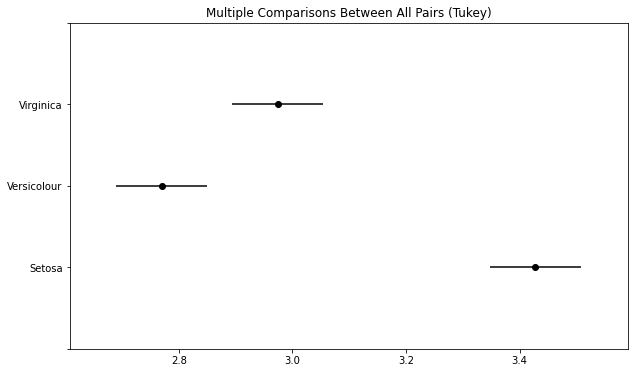

In [34]:
# 사후검정
# 귀무가설: 집단들 사이의 평균은 같다
# 대립가설: 집단들 사이의 평균은 같지 않다.
# 모든 집단 수준에 대하여 두 집단씩 짝을 지어 각각 다중비교를 수행
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data = iris['sepal width'], groups=iris['target'])
tuekeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tuekeyhsd.plot_simultaneous()

In [36]:
tuekeyhsd.summary()
# 모든 수정된 p value < 0.05이므로 각각의 비교에 대한 귀무가설을 모두 기각한다.
# 즉, 모든 종들에 대해서 꽃받침의 폭의 평균값은 통계적으로 유의한 차이가 있다.

group1,group2,meandiff,p-adj,lower,upper,reject
Setosa,Versicolour,-0.658,0.0,-0.8189,-0.4971,True
Setosa,Virginica,-0.454,0.0,-0.6149,-0.2931,True
Versicolour,Virginica,0.204,0.0088,0.0431,0.3649,True


In [37]:
# 만약 정규성을 만족하지 못했을 때 
stats.kruskal(setosa,versicolor,virginica)

KruskalResult(statistic=72.18421220869362, pvalue=2.1154242503359728e-16)

In [41]:
# 만약, 등분산성을 만족하지 못했을 때
#!pip install pingouin
#!conda install pingouin
import pingouin as pg
pg.welch_anova(data = iris, dv ='sepal width', between='target')

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.401587,45.012035,1.432735e-14,0.400783


### 2) 이원배치 분산분석
1. 개념 

- 하나의 종속변수(연속형)에 대한 두 개의 독립변수(범주형) A,B의 영향을 알아보기 위해 사용되는 검증 방법
- 예시: 성별과 학년에 따른 시험점수의 차이에 대해 통꼐적으로 검정하기 위해
- 두 독립변수 사이의 상관관계가 있는지 살펴보는 교호작용 검증 필수
- F 검정통계량 이용

2. 가정 

- 집단의 측정치는 서로 독립적이요, 정규분포를 따른다.
- 집단 측정치의 분산은 같다(등분산성 가정)

3. 가설

- 귀무가설 1: a와 b변수의 상호작용 효과가 없다
- 귀무가설 2: a변수에 따른 종속변수의 값에는 차이가 없다.
- 귀무가설 3: b변수에 따른 종속변수의 값에는 차이가 없다.

4. 사후검정

- 던칸의 MRT, vitudml LSD, 튜키의 HSD

5. 단계
-  일원배치 분산분석과 분석 단계 동일

In [43]:
import pandas as pd
mtcars = pd.read_csv('./data/mtcars.csv')
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [44]:
# cyl, am, mpg 변수들로만 구성된 분석용 데이터세트 생성
mtcars = mtcars[['mpg', 'am', 'cyl']]
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   am      32 non-null     int64  
 2   cyl     32 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


In [46]:
# 종속변수 mpg, 독립녀수 am, cyl
# 교호작용 검정 귀무가설: 변속기 종류와 실린더 개수 간에는 상호작용 효과가 없다
# 주효과 검정1: 실린더 개수에 따른 주행거리의 차이는 존재하지 않는다.
# 주효과 검정2: 변속기 종류에 따른 주행거리의 차이는 존재하지 않는다.
# 분산분석 수행
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = ' mpg ~ C(cyl)+ C(am)+ C(cyl):C(am)'
model = ols(formula, mtcars).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


In [47]:
## 1)교호작용 검정결과
### cyl 변수와 am 변수 간의 상호작용 효과 검정결과(C(cyl):C(am)) p-value는 0.2686으로 0.05보다 크므로 귀무가설을 기각하지 않는다
### 즉, 종속변수간에는 교호작용이 존재하지 않는다.

## 2) cyl 변수 주효과 검정
### cyl 변수에 대한 p-value는 0.05보다 작으므로, 주효과 검정 귀무가설을 기각한다.
### 즉, 실린더 개수에 따라 주행거리의 차이는 존재한다.

## 3) am 변수 주효과 검정
### am 변수에 대한 p-value는 0.05보다 크므로, 주효과 검정 귀무가설을 기각하지 않는다.
### 즉, 변속기 종류에 따른 주행거리의 차이는 존재하지 않는다. 

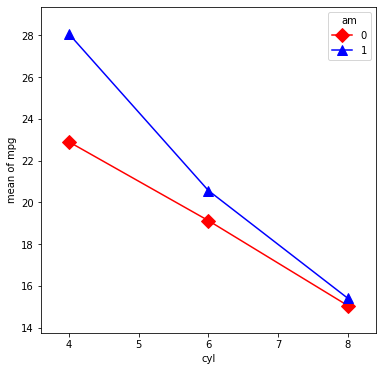

In [49]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

# 독립변수 cyl, am와 종속변수 mpg을 Series로 변경
cyl = mtcars['cyl']
am = mtcars['am']
mpg = mtcars['mpg']
fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(cyl, am, mpg, colors=['red','blue'], markers=['D','^'],ms=10, ax=ax)
# 상호작용 그래프에 두 선이 서로 교차하고 있을 시에는 X 축에는 있는 독립변수와 그래프에서 시각화된 독립변수 간에는 상호작용이 존재한다고 해석

## 교차분석(카이제곱 검정)
- 검정의 목적: 설명변수가 범주형 변수인 경우에 사용하는 통계기법
- 데이터에서 각 범주에 따른 결과변수의 분포를 설명하거나, 범주형 변수가 두 개 이상인 경우 두 변수가 상관이 있는지 검정

### 1) 적합성 검정
- 개념: 적합성 검정은 각 범주에 따른 데이터의 빈도분포가 이론적으로 기대하는 분포를 따르는지 검정
- 관찰빈도: 자료로부터 얻은 빈도분포
- 기대빈도: 두 변수가 독립일 때 이론적으로 기대할 수 있는 분포

In [54]:
# titanic 데이터 불러오기
import pandas as pd 
df = pd.read_csv('./data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
# 귀무가설: 타이타닉호의 생존자 중 남자의 비율 50%, 여자의 비율이 50%이다
# 대립가설: 타이타닉호의 생존자 중 남자의 비율 50%, 여자의 비율이 50%라고 할 수 없다,


In [61]:
df_t = df[df['Survived']==1]
table = df_t[['Sex']].value_counts()
table

Sex   
female    233
male      109
dtype: int64

In [65]:
# sex 변수에 대한 도수분포표를 생성 후 범주별 관찰빈도를 확인하고 적합도 검증을 실행
# chisquare(f_obs, f_exp=None, ddof=0, axis=0)
# f_obs: 관찰빈도로 pd.value_counts()값 입력
# f_exp: 각 카테고리의 기대 빈도이다.
# ddof = 자유도
from scipy.stats import chisquare
chi = chisquare(table, f_exp=[171,171])
print('<적합성 검정>\n',chi)
# p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다.
# 즉, 타이타닉호에 탄 남자와 여자의 비율은 50:50이라고 할 수 없다.

<적합성 검정>
 Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477235e-11)


## 2) 독립성 검정
- 독립성 검정은 모집단이 두 개의 변수 A,B에 의해 범주화되었을 때, 이 두 변수들 사이의 관계가 독립인지 아닌지를 검정하는 방법
- 예시: 환자의 비만유무와 대사성 질환의 유무가 주어졌을 때, 비만에 따른 질환 비율에 차이가 존재하는지 검정

패키지 설명

- chi2_contingency((observed, correction=True, lambda_=None))
- observed: 관찰빈도로 pd.crosstab
- chi2: 카이제곱 통계량 값
- p-value
- dof: 자유도
- expected: 테이블의 합계를 기반으로 한 기대빈도

In [67]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
# 타이타닉 데이터에서 좌석등급과 생존여부가 서로 독립인지 검정
# 귀무가설: class 변수와 survived 변수는 독립이다.
# 대립가설: class 변수와 survived 변수는 독립이 아니다.

df = pd.read_csv('./data/train.csv')
table = pd.crosstab(df['Pclass'],df['Survived'])
table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [70]:
from scipy.stats import chi2_contingency
chi, p ,df, expect = chi2_contingency(table)
print('Statistic:', chi)
print('p-value: ', p)
print('df: ',df)
print('expect: \n', expect)
# p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다.
# 즉, class 변수와 survived 변수는 독립이 아니다.

Statistic: 102.88898875696056
p-value:  4.549251711298793e-23
df:  2
expect: 
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


## 선형 회귀분석

- R squre: 1- SSR/SST -> 총  변동 중에 설명된 변동의 비율, 높을수록 믿을만한 회귀선이라는 뜻
- RMSE: 예측값에서 실제 관측값을 뺀 값의 제곱의 합을 표본의 수로 나눈것

In [1]:
import pandas as pd
import numpy as np
house = pd.read_csv('./data/kc_house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
house = house[['price','sqft_living']]
house.corr()
# 상관관계가 약 0.7로 양의 상관관계가 있음

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


In [3]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
y = house['price'] # series 형식
x = house[['sqft_living']] # 데이터 프레임 형식
lr = ols('price~ sqft_living',data=house).fit()
y_pred = lr.predict(x)

In [4]:
lr.summary()
# 1) 회귀 모형이 통계적으로 유의한가?
# 귀무가설: 회귀 모형은 유의하지 않다. p-value가 0으로 유의수준 0.05보다 작으므로 귀무가설을 기각한다.
# 즉, 회귀모형은 통계적으로 유의하다.
# 2) R-square의 값이 0.493으로 모형이 전체 데이터의 49.3%를 설명한다고 할 수 있다. -> 모델의 성능이 좋지 않다.
# 3) 모형 내 회귀계수는 유의한가?
# -> p-value가 0.05보다 작으므로 유의하다.
# 만일 회귀 계수가 유의하지 않다면 회귀식을 구하는 것은 의미가 없음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sun, 29 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:54:03   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
x_new = np.array(x)

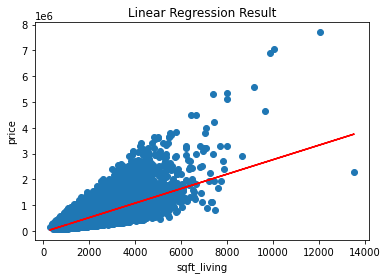

In [6]:
# 시각화
intercept, sqft_living = lr.params
plt.scatter(x,y)
plt.plot(x_new, intercept+sqft_living*x_new, color='red')
plt.xlabel('sqft_living', fontsize=10)
plt.ylabel('price', fontsize=10)
plt.title('Linear Regression Result')
plt.show()

## 다중회귀분석
1) 유의사항
- 다중공선성: 독립변수들 간에 강한 상관관계가 나타나는 문제
- 다중공선성 문제가 존재하면 정확한 회귀계수 추정이 어려움


2) 다중공선성 검사 및 진단 방법
- 독립변수들 간의 상관계수를 구하여 상관성을 직접 파악하고 상관성이 0.9 이상이라면 다중공선성이 있다고 판단
- 다중공성성이 의심되는 두 변수의 회귀분석으로 허용 오차를 구했을 때 0.1이하이면 다중공성선 문제가 심각하다고 할 수 있다. 참) 허용오차: 1 - R-square
- VIF의  값이 10 이상이라면 다중공선성이 존재할 것으로 예상한다

3) 변수선택법
- AIC: 값이 낮을수록 모형의 적합도가 높은 것을 의미

In [7]:
import pandas as pd
Cars = pd.read_csv('./data/Cars93.csv')
Cars.info()
Cars.drop('Unnamed: 0', axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             93 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [8]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

Cars.columns = Cars.columns.str.replace(".","")


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15984\3815188594.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Cars.columns = Cars.columns.str.replace(".","")


In [9]:
Cars.columns

Index(['Manufacturer', 'Model', 'Type', 'MinPrice', 'Price', 'MaxPrice',
       'MPGcity', 'MPGhighway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Revpermile', 'Mantransavail',
       'Fueltankcapacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turncircle', 'Rearseatroom', 'Luggageroom', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [10]:
model = ols(formula = 'Price ~ EngineSize+RPM+Weight+Length+MPGcity+MPGhighway', data=Cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           4.88e-14
Time:                        19:54:06   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
Cars[['EngineSize',"RPM","Weight","Length","MPGcity","MPGhighway"]].corr()
# MPGcity 변수와 MPGhighway는 0.9이상의 상관성을 보이므로 다중공선성이 존재함을 알 수 있다.
# 둘 중 어떤 변수를 제거해야하는지 정하기 위해 VIF값을 구한다

,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
EngineSize,1.000000,-0.547898,0.845075,0.780283,-0.710003,-0.626795
RPM,-0.547898,1.000000,-0.427931,-0.441249,0.363045,0.313469
Weight,0.845075,-0.427931,1.000000,0.806274,-0.843139,-0.810658
Length,0.780283,-0.441249,0.806274,1.000000,-0.666239,-0.542897
MPGcity,-0.710003,0.363045,-0.843139,-0.666239,1.000000,0.943936
MPGhighway,-0.626795,0.313469,-0.810658,-0.542897,0.943936,1.000000


In [12]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 독립변수와 종수변수를 데이터프레임을 나누어 저장
y,x = dmatrices("Price ~ EngineSize+RPM+Weight+Length+MPGcity+MPGhighway", data=Cars, return_type='dataframe')

# 독립변수끼리의 VIF 값을 계산하여 데이터프레임으로 만드는 과정
vif_list=[]
for i in range(1, len(x.columns)):
    vif_list.append([variance_inflation_factor(x.values,i),x.columns[i]])
pd.DataFrame(vif_list,columns=['vif','variable'])
# VIF 값을 통해 다중공선성을 확인한 결과 MPGcity의 변수를 제거해야 한다.

,vif,variable
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


In [14]:
# MPCcity변수를 제거한 후 다중 선형 회귀분석 진행
model = smf.ols(formula = 'Price ~ EngineSize + RPM + Weight + MPGhighway', data= Cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     28.98
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           2.26e-15
Time:                        19:59:44   Log-Likelihood:                -303.29
No. Observations:                  93   AIC:                             616.6
Df Residuals:                      88   BIC:                             629.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.7063     14.846     -2.540      0.013     -67.210      -8.203
EngineSize     4.5884      1.343      3.418      0.001       1.920       7.256
RPM            0.0071      0.001      5.232      0.000       0.004       0.010
Weight         0.0049      0.003      1.690      0.095      -0.001       0.011
MPGhighway    -0.2646      0.221     -1.200      0.234      -0.703       0.174
==============================================================================
Omnibus:                       62.072   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.013
Skew:                           2.047   Prob(JB):                     1.22e-80
Kurtosis:                      11.843   Cond. No.                     1.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:

# 변수선택법
import time
import itertools
def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # modeling
    regr = model.fit() # 모델학습
    AIC = regr.aic # 모델의 AIC
    return {"model":regr, "AIC":AIC}

# 전진선택법
def forward(X,y,predictors):
    # 데이터 변수들이 미리 정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y=y, feature_set=predictors+[p]+['Intercept']))
        
    # 데이터 프레임으로 변환
    models = pd.DataFrame(results)
    #AIC가 가장 낮은 것을 선택
    best_model= models.loc(models['AIC'].argmin())
    print("Processed ", models.shape[0], "models on", len(predictors)+1, 'predictors in')
    print('Selected predictors:',best_model['model'].model.exog_names," AIC:", best_model[0] )
    return best_model

# 후진 소거법
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리 정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(X=X, y=y, feature_set=list(combo)+['intercept']))
        models= pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc=time.time()
    
    print("Processed ", models.shape[0],'models on', len(predictors)-1,'predictors in', (toc-tic))
    print('Selected predictors: ', best_model['model'].model.exon_names,'AIC:', best_model[0])
    
    return best_model

# 단계적 선택법
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=['AIC','model'])
    tic = time.time()
    predictors=[]
    Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']
    
    for i in range(1, len(X.columns.difference(['Intercept'])) +1):
        Forward_result = forward(X=X, y=y, predictors=predictors)
        print('forward')
        Stepmodels.loc[i]=Forward_result
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        Backward_result = backward(X=X, y=y, predictors = predictors)
        
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i]=Backward_result
            predictors = Stepmodels.loc[i]['model'].model.exog_names
            Smodel_before = Stepmodels.loc[i]['AIC']
            predictors = [k for k in predictors if k !='Intercept']
            print('backward')
        
        if Stepmodels.loc[i]['AIC']>Smodel_before:
            break
        else: 
            Smodel_before = Stepmodels.loc[i]['AIC']
    toc = time.time()
    print("Total elapsed time:",(toc - tic), 'seconds.')
    
    return(Stepmodels['model'][len(Stepmodels['model'])])


# 군집분석

In [2]:
# USArrests 데이터의 정보로 거리를 구하고 최단,최장,와드 연결법을 실시
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

US = pd.read_csv('./data/USArrests.csv')
US.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
US.columns = ['State', 'Murder', 'Assault','UrbanPop', 'Rape']
labelList=US.State.tolist()
US.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


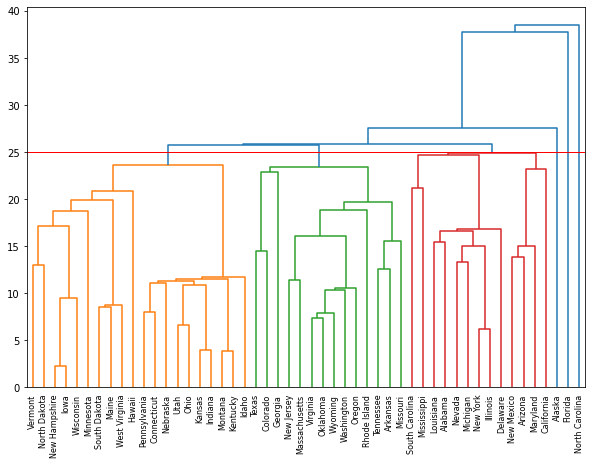

In [7]:
# 최단연결법
single = linkage(US.iloc[:,1::], metric = 'euclidean',method='single')

#덴드로그램 그리기
plt.figure(figsize=(10,7))
dendrogram(single, 
           orientation='top',
           labels=labelList, 
           distance_sort='descending', 
           color_threshold=25, # 군집의 수를 설정하는 height값 설정 
           show_leaf_counts=True)

plt.axhline(y=25, color='r',linewidth=1)
plt.show()

<Figure size 720x504 with 0 Axes>

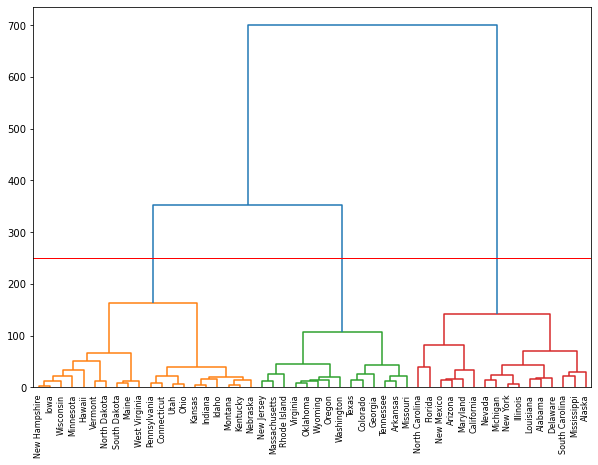

In [9]:
# 와드 연결법
ward = linkage(US.iloc[:,1::], metric='euclidean', method='ward')

# 덴드로그램 그리기
plt.figure(figsize=(10,7))

#덴드로그램 그리기
plt.figure(figsize=(10,7))
dendrogram(ward, 
           orientation='top',
           labels=labelList, 
           distance_sort='descending', 
           color_threshold=250, # 군집의 수를 설정하는 height값 설정 
           show_leaf_counts=True)

plt.axhline(y=250, color='r',linewidth=1)
plt.show()

In [10]:
# state마다 어떤 군집에 설정되었는지 확인
assignments = fcluster(ward,250,'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [12]:
US['cluster'] = assignments
US.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


## 비계층적 군집분석


### K-means 군집분석

In [15]:
# iris 데이터를 활용해 target값을 활용하지 않고 군집분석을 진행했을 때 실제 target 값대로 나누어지는지 확인
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
iris.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
# 클러스터별 콜린스키 하라바츠 결과 비교
from sklearn.metrics import calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

for k in range(2,10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(iris)
    labels = kmeans_model.labels_
    print(calinski_harabasz_score(iris,labels))
# k가 3일때 결과값이 가장높음

513.9245459802768
561.62775662962
530.4871420421675
495.54148767768777
473.5154538824768
443.84523107907245
440.59767319067873
407.0468400265113


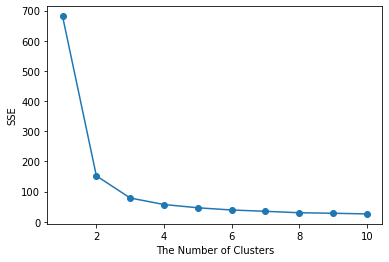

[681.3706, 152.3479517603579, 78.851441426146, 57.256009315718146, 46.44618205128206, 39.066035353535355, 34.723277629233515, 29.99042640692641, 28.27867471563524, 26.094089542638304]


In [25]:
#엘보우 기법을 사용하여 적정한 K의 값을 확인
import matplotlib.pyplot as plt
def elbow(x):
    sse =[]
    for i in range(1,11):
        km = KMeans(n_clusters=i, random_state=1)
        km.fit(x)
        sse.append(km.inertia_)
    
    plt.plot(range(1,11),sse,marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)

elbow(iris)
# k의 값이 2에서 3으로 갈대 기울기 소실이 발생 하므로, 해당 데이터에서는 2~3개의 군집이 적절하다.

In [27]:
# 최적의 k로 K_Means 군집화 실해
km = KMeans(n_clusters=3, random_state=1)
km.fit(iris)
# 할당된 군집을 iris 데이터에 추가
new_labels = km.labels_
iris['cluster'] = new_labels
iris.groupby(['cluster']).mean()

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


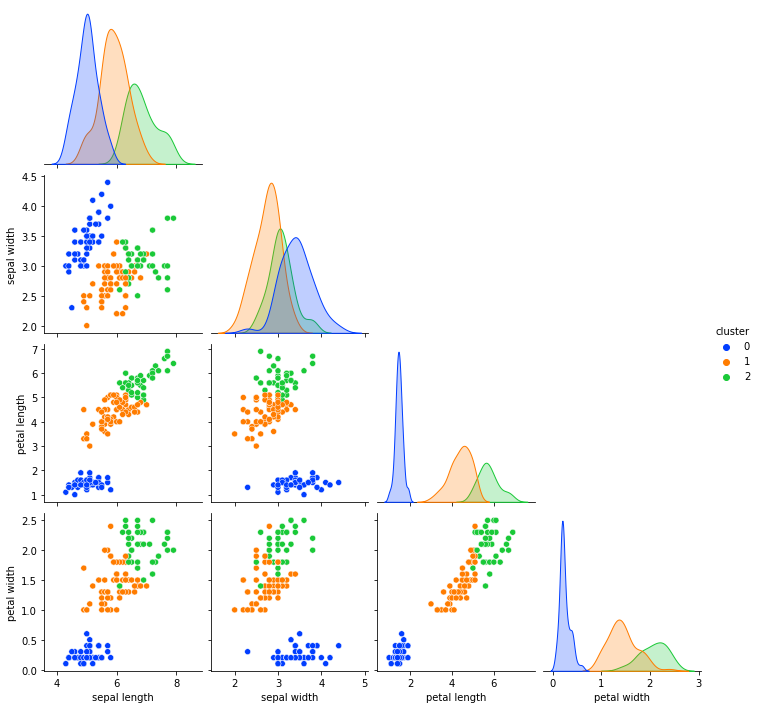

In [29]:
# k-means 시각화
# 군집결과 시각화
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris, diag_kind='kde', hue='cluster', corner=True, palette='bright')
plt.show()

### 혼합분포 군집분석

In [32]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# 데이터 업로드
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']

# 데이터 스케일링
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris)

# 가우시간 혼합모델 구축
gmm = GaussianMixture(n_components=3)
gmm.fit(iris_scaled)
gmm_labels = gmm.predict(iris_scaled)
gmm_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [34]:
iris['gmm_cluster'] = gmm_labels
#군집의 변수별 통계량 확인
clusters=[0,1,2]
iris.groupby('gmm_cluster').mean()

,sepal length,sepal width,petal length,petal width
gmm_cluster,,,,
0,5.904444,2.775556,4.193333,1.293333
1,5.006000,3.428000,1.462000,0.246000
2,6.554545,2.950909,5.489091,1.989091


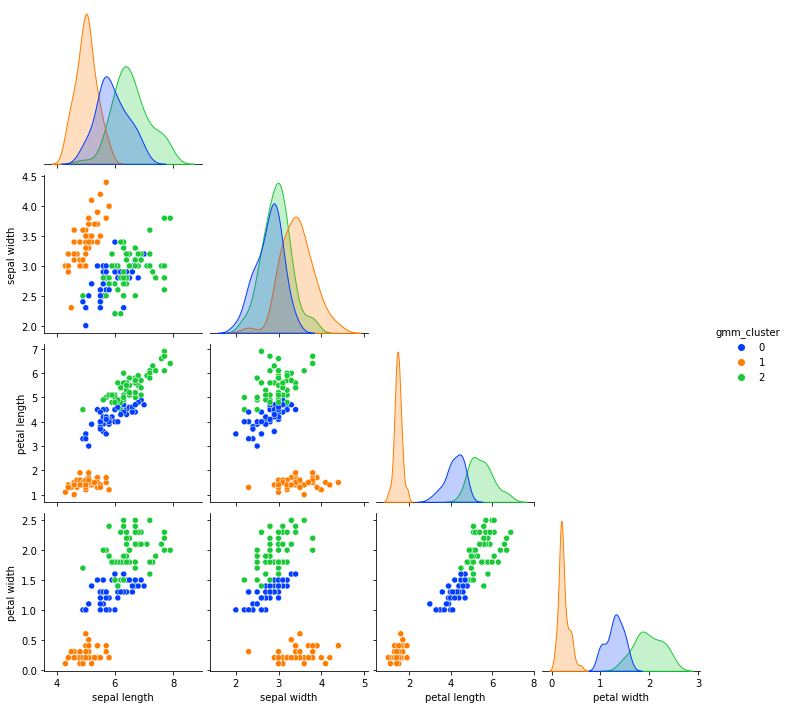

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris, diag_kind='kde', hue='gmm_cluster', corner=True, palette='bright')
plt.show()

# 연관분석

Run-test
- 귀무가설: 연속적인 관측값이 임의적이다
- 연속적인: 연속적인 관측값이 임의적이 아니다.
- 패키지 설명: runtest_1samp(x, cutoff='mean', correction=True)
- x: 2개의 binary data를 배열형식으로 받음, 관측값은 정수
- cutoff: data를 큰 값과 작은 값으로 나누기 위한 기준
- correction: 50 미만의 샘플사이즈일 경우 데이터에 각 사건이 일어날 확률을 정의하기 어려우므로 해당 확률을 0.5 로 수정 

In [1]:
import pandas as pd
data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']
test_df = pd.DataFrame(data, columns=['product'])
test_df.head()

,product
0,a
1,a
2,b
3,b
4,a


In [2]:
# Run-test를 위한 데이터 변환
test_df['product'] = test_df['product'].map({'a':1,"b":0})
test_df

,product
0,1
1,1
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [4]:
from statsmodels.sandbox.stats.runs import runstest_1samp


# Perform Runs test
runstest_1samp(test_df['product'],cutoff=0.5,correction=True)
# p-value가 0.05보다 크므로 귀무가설을 기각한다.
# 즉, a와 b의 구매에 연관이 없다.

(-1.1144881152070183, 0.26506984027306035)

## 연관규칙분석
1) 척도
- 지지도: A와 B가 동시에 포함된 거래수/ 전체 거래수
- 신뢰도: A,B가 동시에 포함된 거래수/ A를 포함한 거래수
- 향상도: A와 B가 동시에 포함된 거래수/ A를 포함한 거래수 * B를 포함한 거래수

2) Apriori알고리즘
- 모든 품목잡합에 대한 지지도를 전부 계산하는 것이 아닌, 최소 지지도 이상의 빈발항목집합을 찾은 후 그것들에 대해서만 연관규칙을 계산
- 장점: 구현과 이해가 쉬움
- 단점: 지지도가 낮은 후보 집합을 생성 시 아이템의 개수가 많아지면 계산 복잡도가 증가함


In [10]:
#!pip install mlxtend

In [12]:
import pandas as pd 
from mlxtend.preprocessing import TransactionEncoder
dataset = [['Apple', 'Beer', 'Rice','Chicken'],
          ['Apple','Beer','Rice'],
          ['Apple','Beer'],
          ['Apple','Bananas'],
          ['Milk','Beer','Rice','Chicken'],
          ['Milk','Beer','Rice'],
          ['Milk','Beer'],
          ['Apple','Bananas']]
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
print(te.columns_)
te_ary

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']


array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [13]:
df = pd.DataFrame(te_ary, columns= te.columns_)
df

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


In [14]:
# 최소 지지도가 0.6 이상인 품목만 추출
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.625,(Apple)
1,0.750,(Beer)


In [16]:
apriori(df, min_support=0.3, use_colnames=True)

,support,itemsets
0,0.625,(Apple)
1,0.750,(Beer)
2,0.375,(Milk)
3,0.500,(Rice)
4,0.375,"(Beer, Apple)"
5,0.375,"(Beer, Milk)"
6,0.500,"(Beer, Rice)"


In [15]:
## 규칙의 길이를 추출하는 방법
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

,support,itemsets,length
0,0.625,(Apple),1
1,0.750,(Beer),1
2,0.375,(Milk),1
3,0.500,(Rice),1
4,0.375,"(Beer, Apple)",2
5,0.375,"(Beer, Milk)",2
6,0.500,"(Beer, Rice)",2


In [21]:
df = pd.read_csv('./data/Groceries_dataset.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [27]:
transactions = df.groupby(['Member_number','Date'])
transactions.count()

itemDescription
Member_number Date                       
1000          15-03-2015                4
              24-06-2014                3
              24-07-2015                2
              25-11-2015                2
              27-05-2015                2
...                                   ...
4999          24-01-2015                6
              26-12-2015                2
5000          09-03-2014                2
              10-02-2015                3
              16-11-2014                2

[14963 rows x 1 columns]

In [33]:
list_transactions = [i[1]['itemDescription'].tolist() for i in list(transactions)]

In [36]:
groceries = []
for i in range(len(list_transactions)):
    temp = list(filter(None, list_transactions[i]))
    groceries.append(temp)
groceries

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [37]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
te = TransactionEncoder()
groceries_tr = te.fit(groceries).transform(groceries)
groceries_tr = pd.DataFrame(groceries_tr, columns=te.columns_)
groceries_tr

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
from mlxtend.frequent_patterns import apriori
# 지지도가 5%이상인 빈번항목집합 탐색

groceries_ap = apriori(groceries_tr, min_support=0.01, use_colnames=True)
groceries_ap

,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.016574,(beverages)
4,0.045312,(bottled beer)
...,...,...
64,0.010559,"(other vegetables, rolls/buns)"
65,0.014837,"(other vegetables, whole milk)"
66,0.013968,"(whole milk, rolls/buns)"
67,0.011629,"(soda, whole milk)"


In [46]:
# association_rules 함수 사용
from mlxtend.frequent_patterns import association_rules
# 신뢰도가 0.01이상인 빈번항목집합 탐색
association_rules(groceries_ap,metric='confidence', min_threshold=0.01)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249
1,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117
2,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551
3,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
6,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636
7,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663
8,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
9,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638


# 시계열 분석

## 시계열 분해
- 시계열 자료를 추세, 계절성, 잔차로 분해하는 기법
1) 모형 판단
- 시계열 데이터를 보고 시계열의 주기적 반복/계절성이 있는지에 따라 Additive 모형과 Multipliactive모형 선택
- 추세와 계절성이 별개로 존재하면 Additive 모형, 추세에 따라 계절성이 있다면 Multiplicative모형 적용


In [20]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('./data/market-price.csv', names=['day','price'])
data

,day,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000
...,...,...
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [21]:
data['day']= pd.to_datetime(data['day'],format= '%Y-%m-%d')
df= data.set_index('day')
df

,price
day,
2017-08-27,4354.308333
2017-08-28,4391.673517
2017-08-29,4607.985450
2017-08-30,4594.987850
2017-08-31,4748.255000
...,...
2018-08-22,6575.229167
2018-08-23,6434.881667
2018-08-24,6543.645714


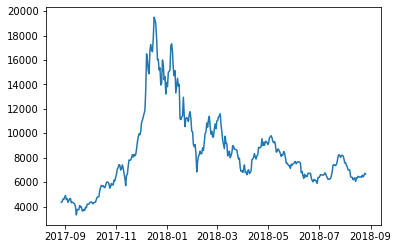

In [22]:
import matplotlib.pyplot as plt
plt.plot(df.index,df['price'])
#

In [27]:
# 정상성 변환: 비정상 시계열을 정상 시계얄로 변환
# Augmented Dickey-Fuller test 가설(귀무가설: 데이터기 정상성을 갖지 않는다.)

from statsmodels.tsa.stattools import adfuller

adf = adfuller(df, regression='nc')
print(adf[0])
print(adf[1])

-0.343591878886131
0.5590818553504244


<AxesSubplot:xlabel='day'>

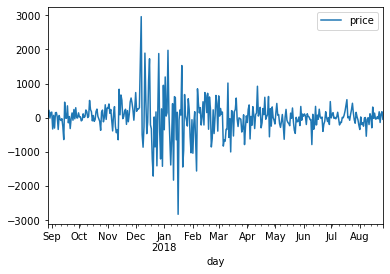

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_data = df.diff(1)
diff_data = diff_data.dropna()
diff_data.plot()

In [31]:
adf= adfuller(diff_data)
print(adf[0])
print(adf[1])

-5.3796728204908355
3.7365967622188164e-06


### AR
1) 개념
- 현 시점의 데이터를 이전의 데이터들의 상관성으로 나타내는 모형
- 과거의 값이 현재의 값에 얼마나 영향을 미쳤는지 파악하는 것
- 만약 과거의 값이 현재의 값에 영향을 미치지 않았다면 모형의 성능은 낮아진다.
- 최적의 성능을 가지는 모델을 만들 수 있는 과거의 값을 p라고 하며 AR(p) 모형이라 한다.

2) ACF
- ACF 값을 시차에 따른 그래프로 시각화 하면 최적 p값을 찾을 수 있다. 
- 비정상 시계열의 경우 ACF값은 느리게 0에 접근하면 양수의 값을 가질 수 있다.
- 정상 시계열의 경우 ACF값은 빠르게 0으로 수렴, 0으로 수렴할 때에 시차를 p값으로 설정


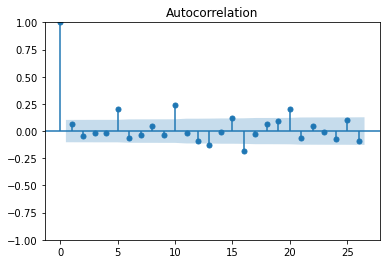

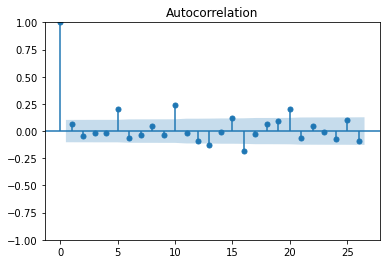

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(diff_data)
# 최적의 p값 1

### MA 모형
1) 개념 
- 과거의 예측 오차들이 가중이동평균으로 현재 시점의 데이터를 표현하는 모형이다.
- 과거의 여측 오차를 이용하여 미래를 예측하는 모형
- MA 모형이 최적이 되게끔 하는 변수 값이 q이며 이 모형을 MA(q) 모형이라 한다.

2) PACF
- 편자기상관 함수
- 시차가 다른 두 시계열 데이터 간의 순수한 상호 연관성을 나타냄
- PACF 값이 0에 수렴할 때의 q 값을 MA모형의 q 값으로 설정

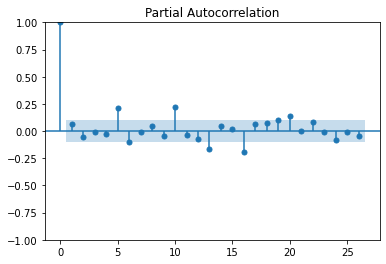

In [35]:
plot_pacf(diff_data)
plt.show()

### ARIMA
- p = ACF ,d= 차분의 횟수, q = PACF
